### SIMPLE INTEREST & AVERAGE RETURNS

Download the data for Microsoft (‘MSFT’) from IEX for the period ‘2018-1-1’ until today.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
from iexfinance.stocks import Stock, get_historical_data

In [32]:
api_key = 'API_KEY'

In [33]:
MSFT = Stock('MSFT', output_format='pandas', token=api_key)

In [34]:
from datetime import datetime

In [35]:
start = datetime(2015, 1, 1)
end = datetime(2022, 12, 30)

In [36]:
MSFT = get_historical_data('MSFT', start, end, output_format = 'pandas', token=api_key)

In [37]:
MSFT

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
2015-01-02,46.76,47.42,46.54,46.66,2015-01-02,MSFT,27913852,HISTORICAL_PRICES,MSFT,,...,46.54,27913852,41.2052,41.2935,41.8764,41.0992,27913852,"Jan 2, 15",0.31,0.0067
2015-01-05,46.325,46.73,46.25,46.37,2015-01-05,MSFT,39673865,HISTORICAL_PRICES,MSFT,,...,46.25,39673865,40.9491,40.9094,41.267,40.8431,39673865,"Jan 5, 15",-0.435,-0.0093
2015-01-06,45.65,46.749,45.54,46.38,2015-01-06,MSFT,36447854,HISTORICAL_PRICES,MSFT,,...,45.54,36447854,40.958,40.3133,41.2838,40.2162,36447854,"Jan 6, 15",-0.675,-0.0146
2015-01-07,46.23,46.46,45.49,45.98,2015-01-07,MSFT,29114061,HISTORICAL_PRICES,MSFT,,...,45.49,29114061,40.6047,40.8255,41.0286,40.172,29114061,"Jan 7, 15",0.58,0.0127
2015-01-08,47.59,47.7499,46.72,46.75,2015-01-08,MSFT,29645202,HISTORICAL_PRICES,MSFT,,...,46.72,29645202,41.2847,42.0265,42.1677,41.2582,29645202,"Jan 8, 15",1.36,0.0294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,238.73,238.87,233.943,236.11,2022-12-23,MSFT,21206982,HISTORICAL_PRICES,MSFT,,...,233.9428,21206982,235.52,238.134,238.273,233.358,21206982,"Dec 23, 22",0.54,0.0023
2022-12-27,236.96,238.93,235.83,238.7,2022-12-27,MSFT,16688648,HISTORICAL_PRICES,MSFT,,...,235.83,16688648,238.104,236.368,238.333,235.241,16688648,"Dec 27, 22",-1.77,-0.0074
2022-12-28,234.53,239.72,234.17,236.89,2022-12-28,MSFT,17457104,HISTORICAL_PRICES,MSFT,,...,234.17,17457104,236.298,233.944,239.121,233.585,17457104,"Dec 28, 22",-2.43,-0.0103
2022-12-29,241.01,241.92,235.65,235.65,2022-12-29,MSFT,19770693,HISTORICAL_PRICES,MSFT,,...,235.65,19770693,235.061,240.408,241.316,235.061,19770693,"Dec 29, 22",6.48,0.0276


### Simple Rate of Return

Calculate the simple returns of ‘MSFT’ for the given timeframe.

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [39]:
MSFT['simple_return'] = (MSFT['close'] / MSFT['close'].shift(1)) - 1
print (MSFT['simple_return'])

2015-01-02         NaN
2015-01-05   -0.009303
2015-01-06   -0.014571
2015-01-07    0.012705
2015-01-08    0.029418
                ...   
2022-12-23    0.002267
2022-12-27   -0.007414
2022-12-28   -0.010255
2022-12-29     0.02763
2022-12-30   -0.004938
Name: simple_return, Length: 2013, dtype: object


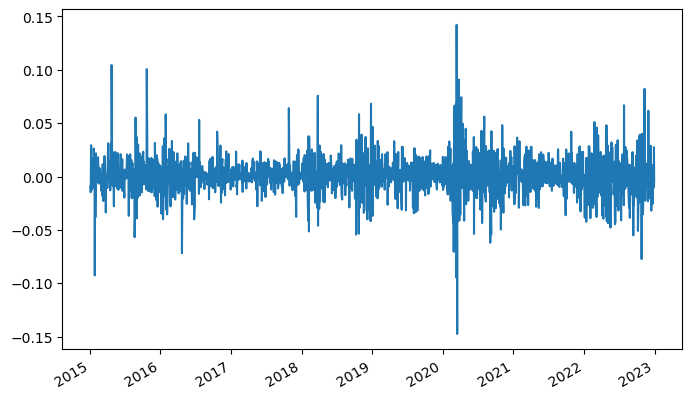

In [41]:
MSFT['simple_return'].plot(figsize=(8, 5))
plt.show()

### Calculate the average daily return

In [42]:
avg_returns_d = MSFT['simple_return'].mean()
avg_returns_d

0.0009702289107316202

### Estimate the average annual return.

In [44]:
avg_returns_a = MSFT['simple_return'].mean() * 250
avg_returns_a

0.24255722768290505

Print the percentage version of the result as a float with 2 digits after the decimal point.

In [45]:
print (str(round(avg_returns_a, 4) * 100) + ' %')

24.26 %
